In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\user\\PycharmProjects\\JuiceProject\\Data_with_loop_price.csv", sep=";", index_col=0, 
                parse_dates=["date"])

In [3]:
df

,date,salesvolume,price,orange,apple,cherry,peachapricot,pineapple,multifruit,tomato,...,750,1000,1500,2000,3000,Season,Working_day,Holiday,tempC,new_price
0,2009-01-01,1,71.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,-7,71.0
1,2009-01-01,2,71.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,-7,71.0
2,2009-01-01,6,71.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,-7,71.0
3,2009-01-01,0,NaN,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,-7,71.0
4,2009-01-01,1,71.0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,-7,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520783,2012-01-11,0,NaN,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,-13,78.0
520784,2012-01-11,3,74.0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,-13,74.0
520785,2012-01-11,0,NaN,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,-13,83.0
520786,2012-01-11,0,NaN,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,-13,83.0


In [4]:
# Логистическая регрессия , для всех данных
df.drop(["date","price"], axis=1, inplace=True)

In [5]:
df.sample(10)

,salesvolume,orange,apple,cherry,peachapricot,pineapple,multifruit,tomato,grapefruit,other,...,750,1000,1500,2000,3000,Season,Working_day,Holiday,tempC,new_price
176930,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,3,1,0,20,59.0
100110,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,3,1,0,14,80.0
238917,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,-8,51.0
280410,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,15,34.0
268201,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2,0,0,7,68.0
418976,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,3,1,0,26,97.0
152483,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2,0,0,-3,82.0
394971,3,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,2,1,0,25,108.0
440836,3,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,1,0,2,95.0
347340,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,-20,99.0


In [6]:
df.salesvolume[df.salesvolume > 0] = 1
df.salesvolume[df.salesvolume == 0] = -1

In [7]:
Y = df.salesvolume
X = df.drop("salesvolume", axis=1)

In [8]:
# Дизабланс? 
print("Первого класса: ", Y [Y == 1].shape[0]/Y.shape[0])
print("Второго класса: ", Y [Y == -1].shape[0]/Y.shape[0])

Первого класса:  0.5823175649208507
Второго класса:  0.4176824350791493


In [9]:
X_cat = X[['orange', 'apple', 'cherry', 'peachapricot', 'pineapple', 'multifruit',
    'tomato', 'grapefruit', 'other', 'applemix', 'mix', 'carton', 'sugar', 'salt', 'pulp', 'Weekday', 'id_sku_factor','id_brand_factor', '200', '240',
   '310', '330', '385', '500', '700','730', '750', '1000', '1500', '2000', '3000', 
   'Season', 'Working_day','Holiday']].astype("category")
X_numeric = X[["new_price", "tempC", "juicecontentreal"]].astype("int64")

In [10]:
X_new = pd.concat([X_numeric, X_cat], axis=1)
#assert X_new.shape[1] == X.shape[1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, shuffle=True, test_size=0.3, random_state=123)

In [12]:
categorical = list(X_train.dtypes[X_train.dtypes == "category"].index)
numerical = list(X_train.dtypes[X_train.dtypes=="int64"].index)


In [13]:
# Без обработки
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("F1 score is: ", f1_score(y_test, y_pred)) # 0.7443062173787541 - baseline


F1 score is:  0.7443062173787541


In [14]:
# Обработаем наши переменные 
column_transformer = ColumnTransformer([
    ("ohe", OneHotEncoder(handle_unknown="ignore"), categorical),
    ("scaling", StandardScaler(), numerical)
])
pipeline = Pipeline(steps=[
    ("ohe_and_scaling", column_transformer),
    ("regression", LogisticRegression())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("f1 score is: ", f1_score(y_test, y_pred)) # f1 score is:  0.7606087716801205

f1 score is:  0.7606087716801205


In [14]:
# Отшкалил вручную
ss = StandardScaler()
X_train_scale = ss.fit_transform(X_train[numerical])
X_test_scale = ss.transform(X_test[numerical])
X_train_scaled = pd.concat([X_train.reset_index()[categorical], pd.DataFrame(X_train_scale)], axis=1)
X_test_scaled = pd.concat([X_test.reset_index()[categorical], pd.DataFrame(X_test_scale)], axis=1)

Best alpha is:  11.11111111111111


Text(0, 0.5, 'F1 score')

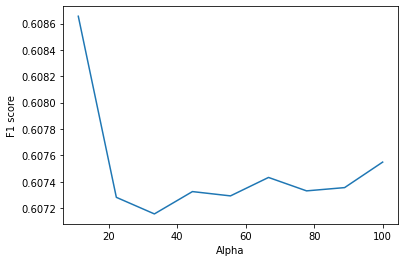

In [16]:
# Посмотрим на регуляризацию 
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')

alphas = np.linspace(0, 100, 10)
searcher = GridSearchCV(LogisticRegression(), [{"C":alphas}], scoring=f1, cv=4)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["C"]

print("Best alpha is: ", best_alpha)

plt.plot(alphas, searcher.cv_results_["mean_test_score"])
plt.xlabel("Alpha")
plt.ylabel("F1 score")


In [17]:
best_alpha = 11

In [18]:
column_transformer = ColumnTransformer([
    ("ohe", OneHotEncoder(handle_unknown="ignore"), categorical),
    ("scaling", StandardScaler(), numerical)
])
pipeline = Pipeline(steps=[
    ("ohe_and_scaling", column_transformer),
    ("regression", LogisticRegression(C = best_alpha))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("f1 score is: ", f1_score(y_test, y_pred)) # 0.7611874394124724

f1 score is:  0.7612576497214131


In [19]:
# cross validation 
from sklearn.model_selection import cross_val_score
lr = LogisticRegression(C = best_alpha)
cv_scores = cross_val_score(lr,np.r_[X_train_scaled, X_test_scaled], np.r_[y_train, y_test], cv=10, scoring=f1)

In [20]:
print("Cross validation score: \n\t", "\n\t".join("%.4f" % x for x in cv_scores))

Cross validation score: 
	 0.6068
	0.6105
	0.6066
	0.6083
	0.6072
	0.6077
	0.6072
	0.6029
	0.6089
	0.6093


In [ ]:
# ROC - AUC 


---

In [19]:
lr = LogisticRegression(C = best_alpha)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("f1 score is : ", f1_score(y_test, y_pred))

f1 score is :  0.7445977511513764


In [20]:
weights = pd.DataFrame(lr.coef_, columns=categorical+numerical)
weights

,orange,apple,cherry,peachapricot,pineapple,multifruit,tomato,grapefruit,other,applemix,...,1000,1500,2000,3000,Season,Working_day,Holiday,new_price,tempC,juicecontentreal
0,-0.01011,-0.00201,0.002369,-0.140212,0.285722,0.254436,0.015428,-0.150107,0.004703,-0.038867,...,-0.050916,0.009273,0.012368,0.29335,-0.050093,-0.047444,-0.079238,-0.088029,0.097521,0.147806


In [23]:
Y[Y == -1] = 0

In [24]:
# интепретация коэффициентов 

import statsmodels.api as sm
logit_model = sm.Logit(Y, X)
result = logit_model.fit()
print(result.summary())

# результаты странные

Optimization terminated successfully.
         Current function value: 0.620555
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            salesvolume   No. Observations:               520788
Model:                          Logit   Df Residuals:                   520751
Method:                           MLE   Df Model:                           36
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:                 0.08679
Time:                        10:13:50   Log-Likelihood:            -3.2318e+05
converged:                       True   LL-Null:                   -3.5389e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
orange              -0.0166   3.22e+05  -5.14e-08      1.000   -6.31e+05    6.31e+05
apple      

---

In [25]:
# Random forest 
from sklearn.ensemble import RandomForestClassifier
column_transformer = ColumnTransformer([
    ("ohe", OneHotEncoder(handle_unknown="ignore"), categorical),
    ("scaling", StandardScaler(), numerical)
])
pipeline = Pipeline(steps=[
    ("ohe_and_scaling", column_transformer),
    ("ensemble", RandomForestClassifier())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("f1 score is: ", f1_score(y_test, y_pred)) #  0.720951281509303

f1 score is:  0.720951281509303


In [26]:
from sklearn.ensemble import GradientBoostingClassifier
column_transformer = ColumnTransformer([
    ("ohe", OneHotEncoder(handle_unknown="ignore"), categorical),
    ("scaling", StandardScaler(), numerical)
])
pipeline = Pipeline(steps=[
    ("ohe_and_scaling", column_transformer),
    ("ensemble", GradientBoostingClassifier())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("f1 score is: ", f1_score(y_test, y_pred))  #0.7654176368909015

f1 score is:  0.7654176368909015


In [23]:
df = pd.read_csv("C:\\Users\\user\\PycharmProjects\\JuiceProject\\Data_with_loop_price.csv", sep=";", index_col=0, 
                parse_dates=["date"])

In [24]:
df_for_gd = df[df.date < "2009-12-31"]
print("Difference between new and old df: ", df.shape[0]-df_for_gd.shape[0])

Difference between new and old df:  470186


In [25]:
df_for_gd.drop(["date", "price"], axis=1, inplace=True)
df_for_gd.salesvolume[df_for_gd.salesvolume == 0] = -1
df_for_gd.salesvolume[df_for_gd.salesvolume > 0] = 1
X = df_for_gd.drop("salesvolume", axis=1)
y = df_for_gd.salesvolume

In [26]:
#Баланс классов 
print("first class: ", np.round((y.shape[0] - y[y==1].shape[0])/y.shape[0] * 100))
print("second class: ", np.round((y.shape[0] - y[y==-1].shape[0])/y.shape[0] * 100))

first class:  37.0
second class:  63.0


In [27]:
X_train_gd, X_test_gd, y_train_gd, y_test_gd = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=123)

In [28]:
X_train_gd

,orange,apple,cherry,peachapricot,pineapple,multifruit,tomato,grapefruit,other,applemix,...,750,1000,1500,2000,3000,Season,Working_day,Holiday,tempC,new_price
20008,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,3,1,0,21,87.0
29497,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,3,1,0,21,92.0
15698,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,20,21.0
44065,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,4,1,0,-5,77.0
45211,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,4,1,0,0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,2,1,0,0,13.0
15377,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,2,0,0,16,79.0
17730,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,3,1,0,19,77.0
28030,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,1,0,22,14.0


In [29]:
y_train_gd

20008   -1
29497    1
15698   -1
44065   -1
45211    1
        ..
7763     1
15377   -1
17730    1
28030   -1
15725   -1
Name: salesvolume, Length: 35421, dtype: int64

In [30]:
# Отшкалил вручную
ss = StandardScaler()
X_train_scale = ss.fit_transform(X_train_gd[numerical])
X_test_scale = ss.transform(X_test_gd[numerical])
X_train_scaled_gd = pd.concat([X_train_gd.reset_index()[categorical], pd.DataFrame(X_train_scale)], axis=1)
X_test_scaled_gd= pd.concat([X_test_gd.reset_index()[categorical], pd.DataFrame(X_test_scale)], axis=1)

In [31]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
column_transformer = ColumnTransformer([
    ("ohe", OneHotEncoder(handle_unknown="ignore"), categorical),
    ("scaling", StandardScaler(), numerical)
])
pipeline = Pipeline(steps=[
    ("ohe_and_scaling", column_transformer),
    ("ensemble", GradientBoostingClassifier())
])

model = pipeline.fit(X_train_gd, y_train_gd)
y_pred = model.predict(X_test_gd)
print("f1 score is: ", f1_score(y_test_gd, y_pred)) #f1 score is:  0.8460388639760836, wall time: 6.15 s

f1 score is:  0.8460388639760836
Wall time: 6.4 s


Если модель обучили на одном году и применили к другому

In [35]:
df_for_gd_2 = df[(df.date > "2009-12-31") & (df.date < "2010-12-31")]
df_for_gd_2.drop(["date", "price"], axis=1, inplace=True)
df_for_gd_2.salesvolume[df_for_gd_2.salesvolume == 0] = -1
df_for_gd_2.salesvolume[df_for_gd_2.salesvolume > 0] = 1
X = df_for_gd_2.drop("salesvolume", axis=1)
y = df_for_gd_2.salesvolume

In [51]:
# разброс класса

print("first class: ", np.round((-y[y == 1].shape[0] + y.shape[0])/y.shape[0], 2))
print("second class", np.round((-y[y != 1].shape[0] + y.shape[0])/y.shape[0], 2))

first class:  0.41
second class 0.59


In [37]:
X_train_gd, X_test_gd, y_train_gd, y_test_gd = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=123)
ss = StandardScaler()
X_train_scale = ss.fit_transform(X_train_gd[numerical])
X_test_scale = ss.transform(X_test_gd[numerical])
X_train_scaled_gd = pd.concat([X_train_gd.reset_index()[categorical], pd.DataFrame(X_train_scale)], axis=1)
X_test_scaled_gd= pd.concat([X_test_gd.reset_index()[categorical], pd.DataFrame(X_test_scale)], axis=1)

In [41]:
y_pred = model.predict(X)
print("f1 score is: ", f1_score(y, y_pred)) # f1 score is:  0.7138312091718595

f1 score is:  0.7138312091718595


In [52]:
df_for_gd_3 = df[(df.date > "2010-12-31") & (df.date < "2011-12-31")]
df_for_gd_3.drop(["date", "price"], axis=1, inplace=True)
df_for_gd_3.salesvolume[df_for_gd_3.salesvolume == 0] = -1
df_for_gd_3.salesvolume[df_for_gd_3.salesvolume > 0] = 1
X = df_for_gd_3.drop("salesvolume", axis=1)
y = df_for_gd_3.salesvolume

In [53]:
print("first class: ", np.round((-y[y == 1].shape[0] + y.shape[0])/y.shape[0], 2))
print("second class", np.round((-y[y != 1].shape[0] + y.shape[0])/y.shape[0], 2))

first class:  0.38
second class 0.62


In [54]:
y_pred = model.predict(X)
print("f1 score is: ", f1_score(y, y_pred)) #f1 score is:  0.7223190715744383

f1 score is:  0.7223190715744383


---

In [1]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075],
    #"min_samples_split": np.linspace(0.1, 0.5, 12),
    #"min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5],
    "max_features":["log2","sqrt"],
    #"criterion": ["friedman_mse",  "mae"],
    #"subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

clf.fit(X_train_gd, y_train_gd)
print(clf.score(X_train_gd, y_train_gd))
print(clf.best_params_)


NameError: name 'GridSearchCV' is not defined

---

In [70]:
# Кластеризация 
df = pd.read_csv("C:\\Users\\user\\PycharmProjects\\JuiceProject\\Data_with_loop_price.csv", sep=";", index_col=0, 
                parse_dates=["date"])

In [71]:
df["Earnings"] = df["salesvolume"] * df["new_price"]

<AxesSubplot:xlabel='Earnings', ylabel='Density'>

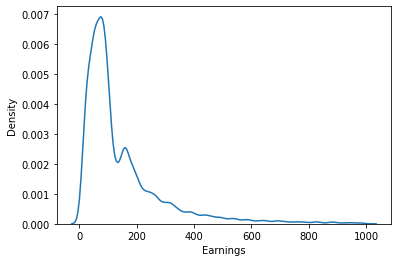

In [72]:
sns.kdeplot(df.Earnings[(df.Earnings > 0) & (df.Earnings < 1000)])

In [138]:
from sklearn.preprocessing import KBinsDiscretizer
binner = KBinsDiscretizer(n_bins=50, strategy='quantile')